In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#Load Data
data = pd.read_csv('customer_data.csv')

In [14]:
#Data Preprocessing
data = data.dropna()
data = pd.get_dummies(data, drop_first=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Annual Income', 'Spending Score']])

C:\Users\youca\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


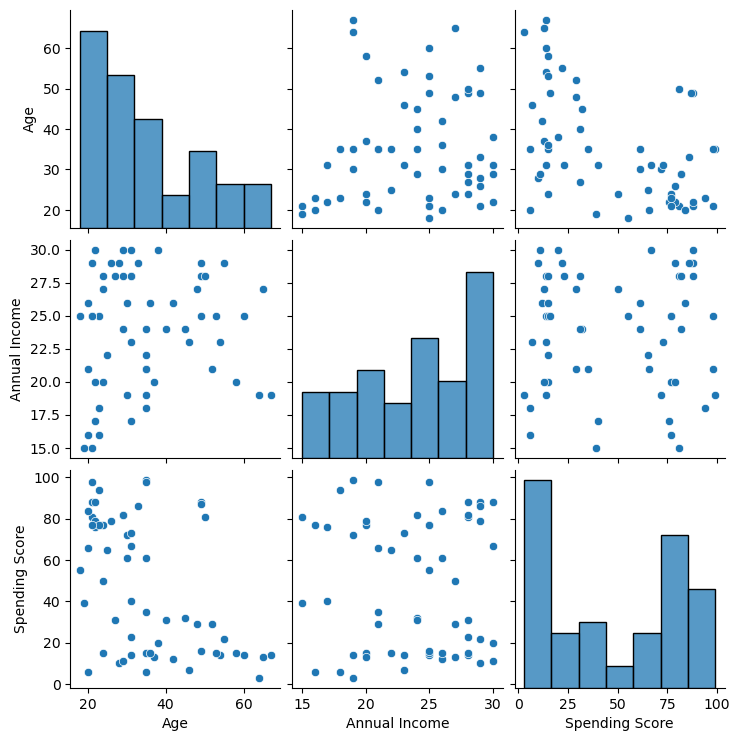

In [15]:
#Exploratory Data Analysis (EDA)
sns.pairplot(data[['Age', 'Annual Income', 'Spending Score']])
plt.show()

C:\Users\youca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\youca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\youca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\youca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

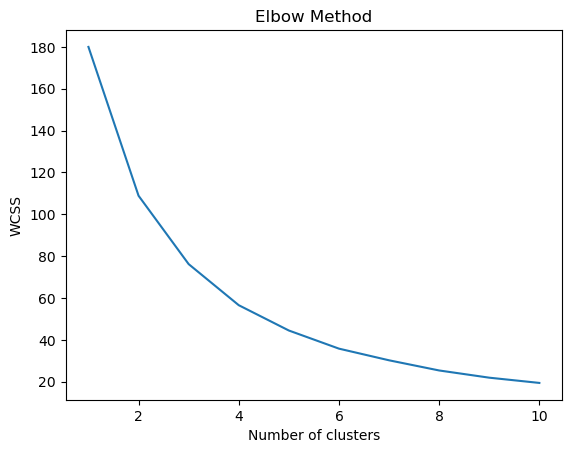

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
#Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

C:\Users\youca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
data['Cluster'] = clusters

In [19]:
#Evaluate the Clusters
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3734580803223369


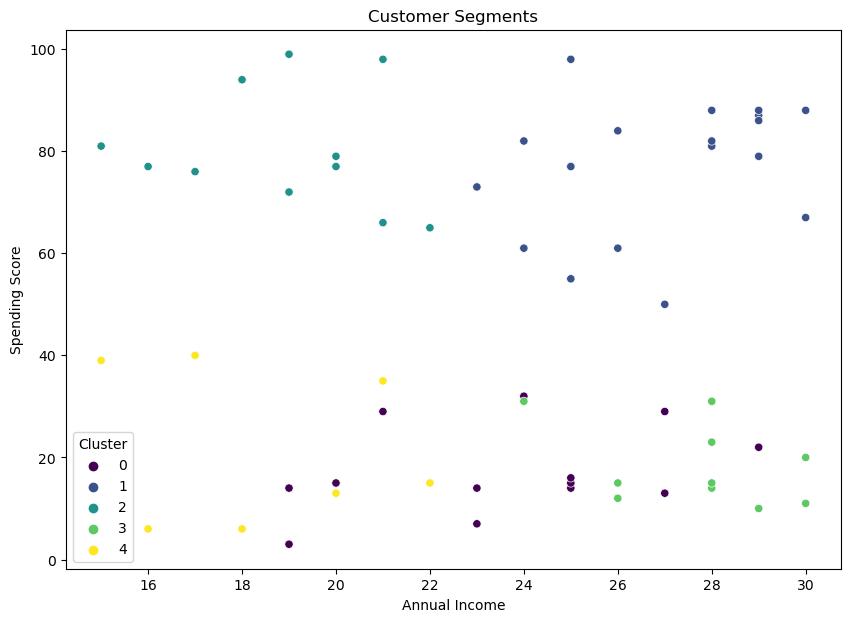

In [20]:
#Visualizing the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income', y='Spending Score', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments')
plt.show()

In [21]:
#Interpretation and Insights
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

         CustomerID        Age  Annual Income  Spending Score  Gender_Male
Cluster                                                                   
0         28.076923  55.076923      23.615385       17.153846     0.307692
1         42.210526  29.578947      26.842105       77.052632     0.315789
2         12.000000  25.454545      18.909091       80.363636     0.363636
3         46.200000  32.600000      27.700000       18.200000     0.100000
4          9.857143  30.285714      18.428571       22.000000     0.285714
